# **Baseline Comparison:** k-Nearest Neighbor Algorithms

### **Part 1:** Load In and Prepare the Data

In [22]:
# Ignore warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
colors = ['#E69F00', '#56B4E9', '#009E73', '#0072B2', '#D55E00']

# Load data
data = pd.read_csv('data/glass.csv')

# Get data headers
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [23]:
clean_data = data.copy()

# Rename the outcome column to poisonous and non-poisonous
clean_data['Type'] = clean_data['Type'].replace(
    {1: 'Building',
     4: 'Vehicle Window',
     5: 'Container',
     6: 'Tableware',
     7: 'Headlamp'
    })

In [24]:
# Separate out classfiers
X = data.copy().drop(columns=['Type'])
y = data.copy()['Type']

# Normalize data
ss = StandardScaler()
ss.fit(X)
X[:] = ss.transform(X)

# Split data for train and test.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

### **Part 2:** Create a k-NN with Baseline Parameters

In [25]:
# Build k-NN baseline using standard parameters

# Form the model
knn_base = KNeighborsClassifier()

# Train each model
knn_base.fit(X_train, y_train)

# Predict the values
knn_base_pred = knn_base.predict(X_test)

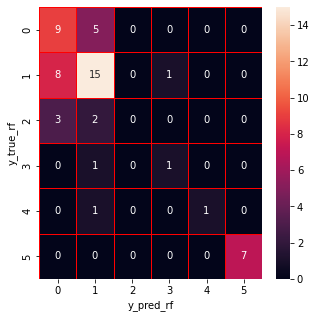

In [26]:
cm = confusion_matrix(y_test, knn_base_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()

### **Part 3:** Create a k-NN with Optimized Parameters

In [27]:
# Source: https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

# List Hyperparameters that we want to tune.
leaf_size = list(range(1, 51, 1))
n_neighbors = list(range(2, 11))
p=[1, 2]

# Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Create new KNN object
knn_opt = KNeighborsClassifier(algorithm='ball_tree')

# Use grid search to find the ideal hyperparamters
grid_search = GridSearchCV(knn_opt, hyperparameters, cv=10, verbose=10)

# Fit the model
grid_search.fit(X_train, y_train)

# Predict the values
knn_opt_pred = grid_search.predict(X_test)

Fitting 10 folds for each of 900 candidates, totalling 9000 fits
[CV 1/10; 1/900] START leaf_size=1, n_neighbors=2, p=1..........................
[CV 1/10; 1/900] END leaf_size=1, n_neighbors=2, p=1;, score=0.688 total time=   0.0s
[CV 2/10; 1/900] START leaf_size=1, n_neighbors=2, p=1..........................
[CV 2/10; 1/900] END leaf_size=1, n_neighbors=2, p=1;, score=0.750 total time=   0.0s
[CV 3/10; 1/900] START leaf_size=1, n_neighbors=2, p=1..........................
[CV 3/10; 1/900] END leaf_size=1, n_neighbors=2, p=1;, score=0.812 total time=   0.0s
[CV 4/10; 1/900] START leaf_size=1, n_neighbors=2, p=1..........................
[CV 4/10; 1/900] END leaf_size=1, n_neighbors=2, p=1;, score=0.500 total time=   0.0s
[CV 5/10; 1/900] START leaf_size=1, n_neighbors=2, p=1..........................
[CV 5/10; 1/900] END leaf_size=1, n_neighbors=2, p=1;, score=0.750 total time=   0.0s
[CV 6/10; 1/900] START leaf_size=1, n_neighbors=2, p=1..........................
[CV 6/10; 1/900] EN

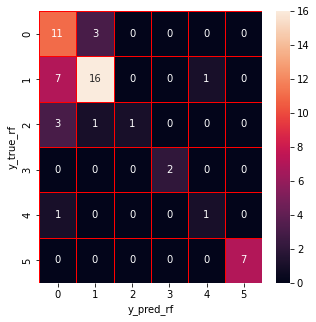

In [28]:
cm = confusion_matrix(y_test, knn_opt_pred)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_rf")
plt.ylabel("y_true_rf")
plt.show()